<a href="https://colab.research.google.com/github/siddham04/GST-Analytics-Prediction-Model/blob/main/GST_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **GST Analytics**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1**    - Simrit Garg
##### **Team Member 2**  -Siddham Jain



# **Project Summary -**

###This project focuses on analyzing and building machine learning models using a Goods and Services Tax (GST) dataset containing 21 columns and over 780,000 entries. The goal is to predict specific tax-related outcomes, ensuring high accuracy while managing data quality and addressing key challenges such as missing values, outliers, multicollinearity, and model optimization.

###The primary objective was to identify patterns within the dataset and develop a robust machine learning model to predict tax-related outcomes. Throughout the process, data preprocessing played a crucial role, especially in managing missing values and handling outliers using statistical methods like Z-score and Interquartile Range (IQR). Yeo-Johnson transformations were applied to normalize the distributions and reduce skewness.

###One of the key challenges encountered was multicollinearity, where several features were highly correlated, potentially affecting the model's performance. While the Variance Inflation Factor (VIF) helped identify these correlations, removing the correlated features resulted in a 20% drop in accuracy. Thus, a strategic decision was made to retain certain correlated columns, as they contributed to better model performance. A Logistic Regression model was implemented, optimized through hyperparameter tuning using GridSearchCV. Parameters like regularization strength (C), penalty types (l1, l2, elasticnet, none), and solver options (liblinear, saga) were fine-tuned to enhance the model's accuracy.

###Overall, this project demonstrated the complexities of working with a large and nuanced dataset like GST. The combination of data preprocessing, multicollinearity management, and hyperparameter tuning resulted in a highly accurate and reliable prediction model. Future improvements may include exploring more complex models, such as Random Forest or XGBoost, and implementing dimensionality reduction techniques like PCA to enhance the efficiency and performance of the predictive model.



###***Dataset Information***

* Number of instances: 4,005

* Number of attributes: 19






###***Features information***:



* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###***Target Variable*** :

* **views**: Count of views



# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**



Given a dataset D, which consists of:
*  Dtrain A matrix of dimension R(m×n) representing the training data.

*   Dtest A matrix of dimension R(m1×n) representing the test data.

*   We have also provided corresponding target variable Ytrain matrix dimension of R(m×1)

*  Ytest   with matrix dimension of R(m1×1).









The objective is to construct a predictive model Fθ(X)→ Ypred that accurately estimates the target variable Y{i} for new, unseen inputs X{i}



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load Dataset
x_train = pd.read_csv('X_Train_Data_Input.csv')
x_test=pd.read_csv('X_Test_Data_Input.csv')
y_train=pd.read_csv('Y_Train_Data_Target.csv')
y_test=pd.read_csv('Y_Test_Data_Target.csv')

### Dataset First View

In [ ]:
# Dataset First Look
x_train.sample(5)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
623655,79e63d7c95003e191cd5f4166bc2e060,0.0,2495,1075.0,0.678139,0.701403,-0.007468,3.440515,-0.015602,0.712290,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
20383,075b8f0271ff86c09afc655b4ecf08a4,0.0,755,2555.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
727415,5e2c35a029b4c533bf07c6e75f39a62d,4.0,530,1327.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.949605,...,1,1,0.001351,0.00339,0.0,0,1.0,0,0,0
586469,cf464ad3985870d0d0d3bf956fb992ab,0.0,2024,4744.0,0.678139,0.701403,-0.007468,-0.407939,-0.015600,0.593882,...,0,1,0.001351,0.00339,0.0,0,0.0,0,0,0
173314,9488514ba21963adf9db75b3c205533b,0.0,415,2410.0,0.678139,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
x_train.shape

(785133, 23)

### Dataset Information

In [ ]:
# Dataset Info
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = x_train.duplicated().sum()

duplicate_count

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_values = x_train.isnull().sum().reset_index()
null_values

,index,0
0,ID,0
1,Column0,9
2,Column1,0
3,Column2,0
4,Column3,126303
5,Column4,127710
6,Column5,167180
7,Column6,3850
8,Column7,0
9,Column8,3850


<Axes: >

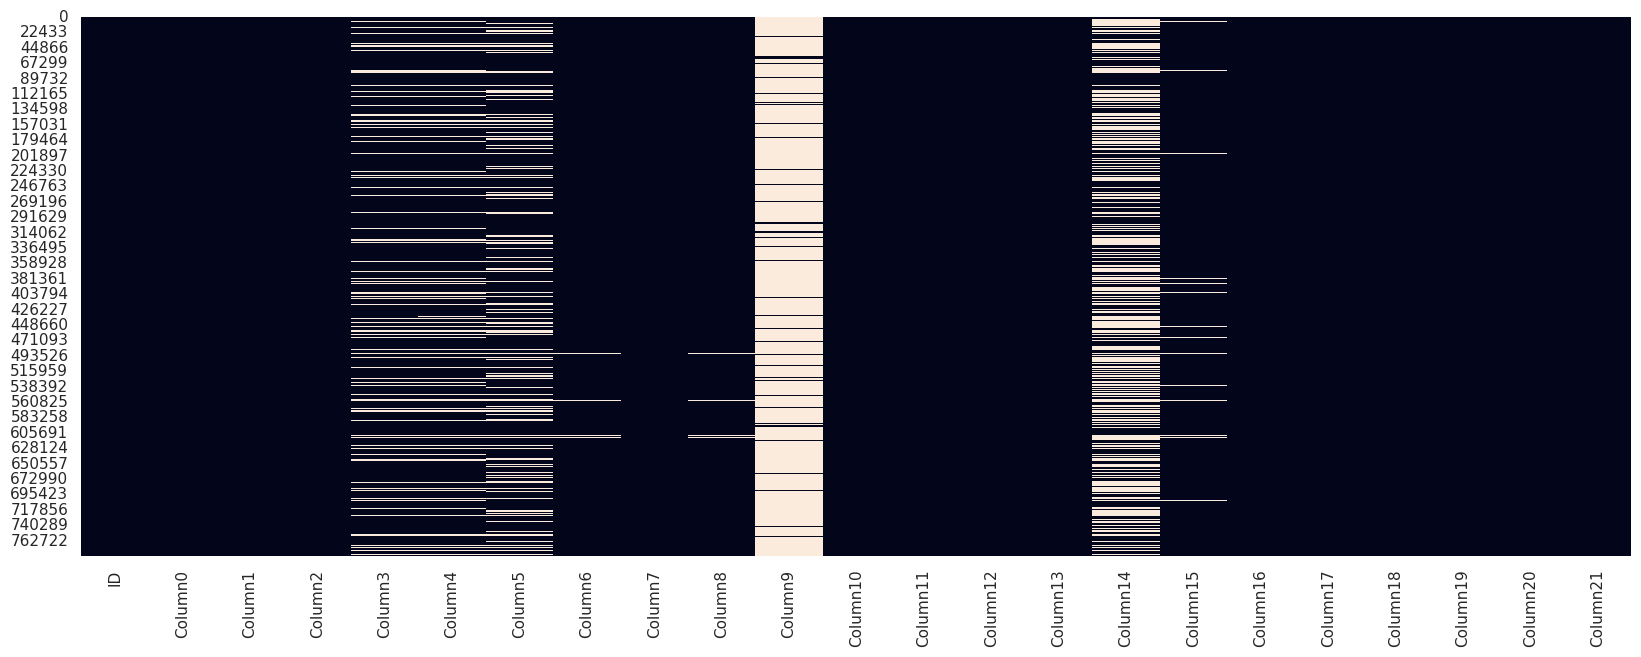

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (20,7))
sns.heatmap(x_train.isnull(), cbar=False)

### What did you know about your dataset?

This dataset have rows 785133 and 23 columns with no duplicated values.It has major missing in some columns comments.Dataset have 9 int64 data_type columns ,13 float64 column and 1 object data type columns.
By visualising, we can see that Column 3,4,5,9,14 have a many null values while Column 6,8,15 contain some null values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(x_train.columns)

Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object')


In [ ]:
# Dataset Describe
x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


### Variables Description

We can see the statistical description of all the columns and we can see that there are some columns which contains negative values , some columns are boolean type also.


We can see the counts of all the value.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = x_train.nunique().reset_index()
unique_values

,index,0
0,ID,785133
1,Column0,19
2,Column1,2564
3,Column2,9424
4,Column3,47
5,Column4,47
6,Column5,148334
7,Column6,157264
8,Column7,166513
9,Column8,355728


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# remove null values from occupations,all_apeakers and recorded date
x_train['Column18']=x_train['Column18'].astype(int)
x_train['Column16']=x_train['Column16'].astype(int)


x_test.drop('Column9',axis=1,inplace=True)
x_train.drop('Column9',axis=1,inplace=True)
x_train.drop('Column14',axis=1,inplace=True)
x_test.drop('Column14',axis=1,inplace=True)
x_train.drop('ID',axis=1,inplace=True)
x_test.drop('ID',axis=1,inplace=True)
y_train.drop('ID',axis=1,inplace=True)
y_test.drop('ID',axis=1,inplace=True)



x_test['Column18']=x_test['Column18'].astype(int)
x_test['Column16']=x_test['Column16'].astype(int)

In [ ]:
# To remove Columns for Multicollinearity
# x_train.drop('Column11', axis=1, inplace=True)
# x_train.drop('Column12', axis=1, inplace=True)
# x_train.drop('Column13', axis=1, inplace=True)
# x_train.drop('Column4', axis=1, inplace=True)
# x_test.drop('Column11', axis=1, inplace=True)
# x_test.drop('Column12', axis=1, inplace=True)
# x_test.drop('Column13', axis=1, inplace=True)
# x_test.drop('Column4', axis=1, inplace=True)

In [ ]:
x_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.00339,0,0,0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.00339,0,0,0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.00339,0,0,0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,1,0,0,0
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,1,0,0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,1,1,1,0.00339,0,0,0,0,0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,0,1,1,0.00339,0,0,0,0,0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,1,1,1,0.00339,0,0,0,0,0,0


In [ ]:
# replace the null values with avg of column
x_train['Column0'].fillna(x_train['Column0'].mean(),inplace =True)
x_test['Column0'].fillna(x_test['Column0'].mean(),inplace =True)

x_train['Column3'].fillna(x_train['Column3'].mean(),inplace =True)
x_test['Column3'].fillna(x_test['Column3'].mean(),inplace =True)

x_train['Column5'].fillna(x_train['Column5'].mean(),inplace =True)
x_test['Column5'].fillna(x_test['Column5'].mean(),inplace =True)

x_train['Column6'].fillna(x_train['Column6'].mean(),inplace =True)
x_test['Column6'].fillna(x_test['Column6'].mean(),inplace =True)

x_train['Column8'].fillna(x_train['Column8'].mean(),inplace =True)
x_test['Column8'].fillna(x_test['Column8'].mean(),inplace =True)

x_train['Column15'].fillna(x_train['Column15'].mean(),inplace =True)
x_test['Column15'].fillna(x_test['Column15'].mean(),inplace =True)

In [ ]:
# Again check the null values
x_test.isnull().sum().reset_index()


,index,0
0,Column0,0
1,Column1,0
2,Column2,0
3,Column3,0
4,Column4,42710
5,Column5,0
6,Column6,0
7,Column7,0
8,Column8,0
9,Column10,0


### What all manipulations have you done and insights you found?

Inference:-

1.First of all we removed all the null values.

2.Drop all the unwanted columns.

3.Changed datatypes to integer from float.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

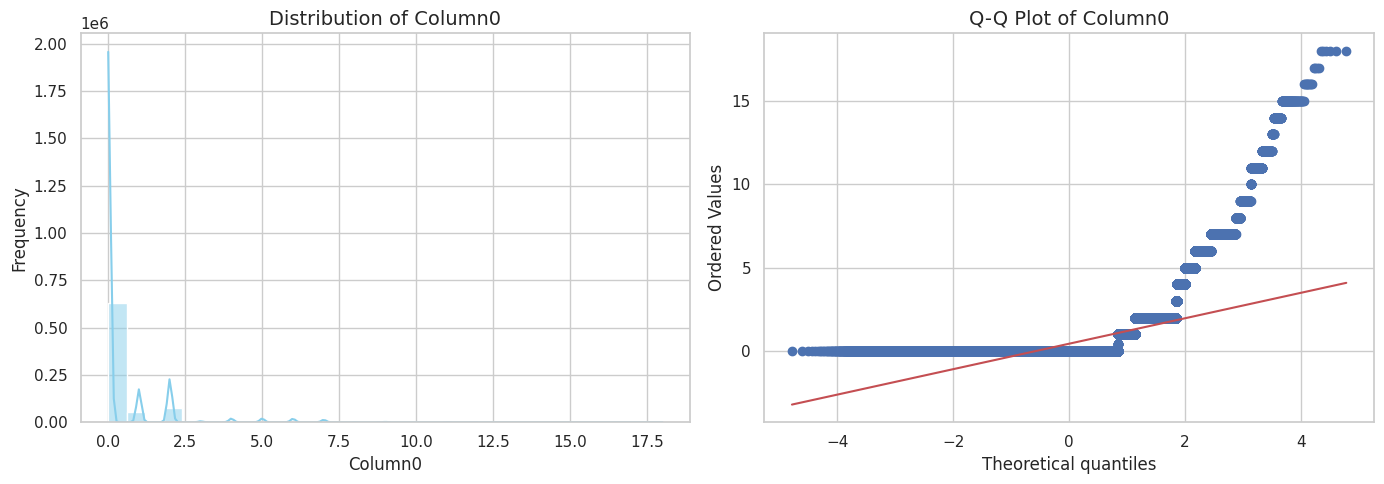

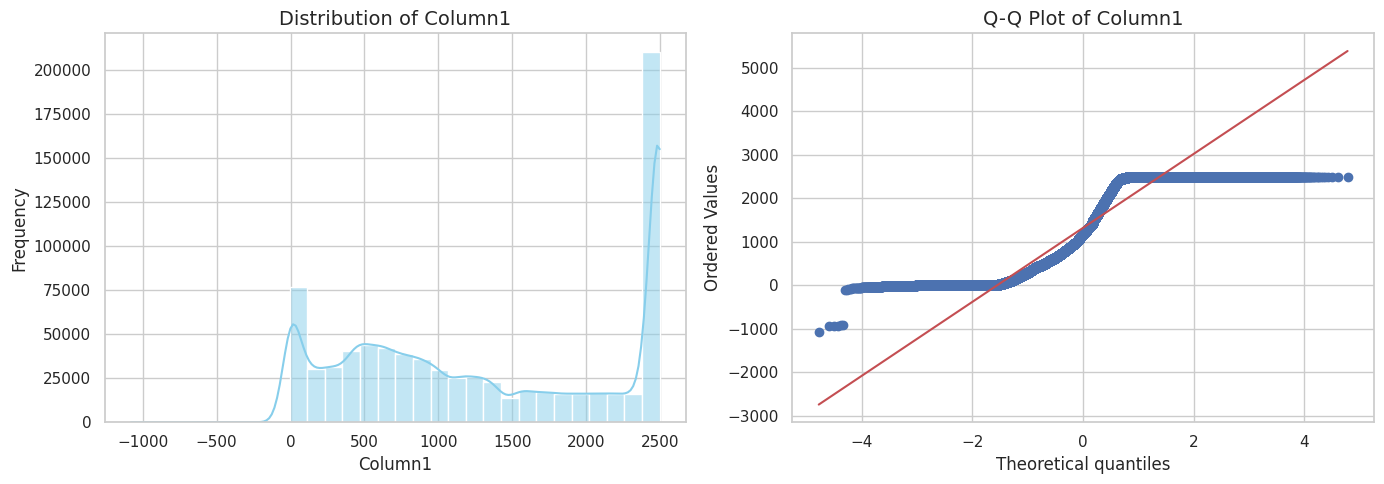

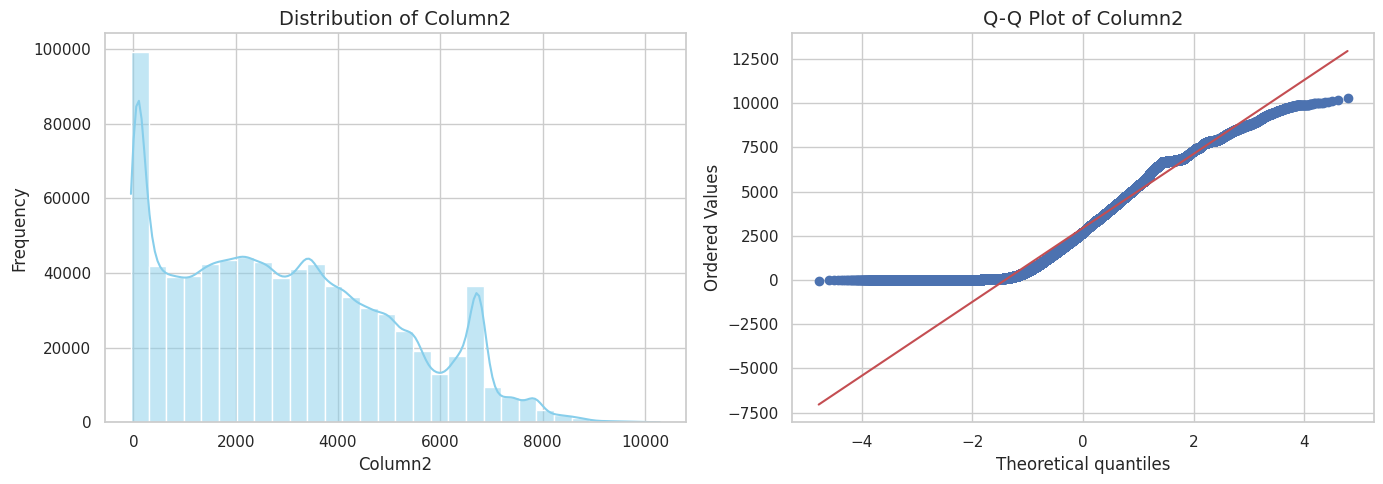

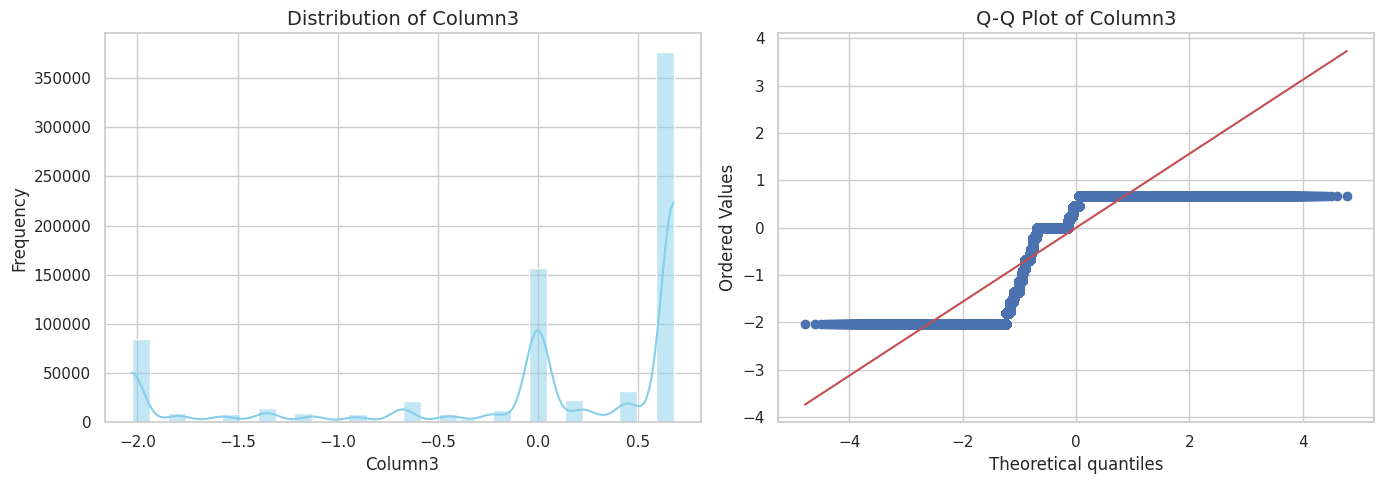

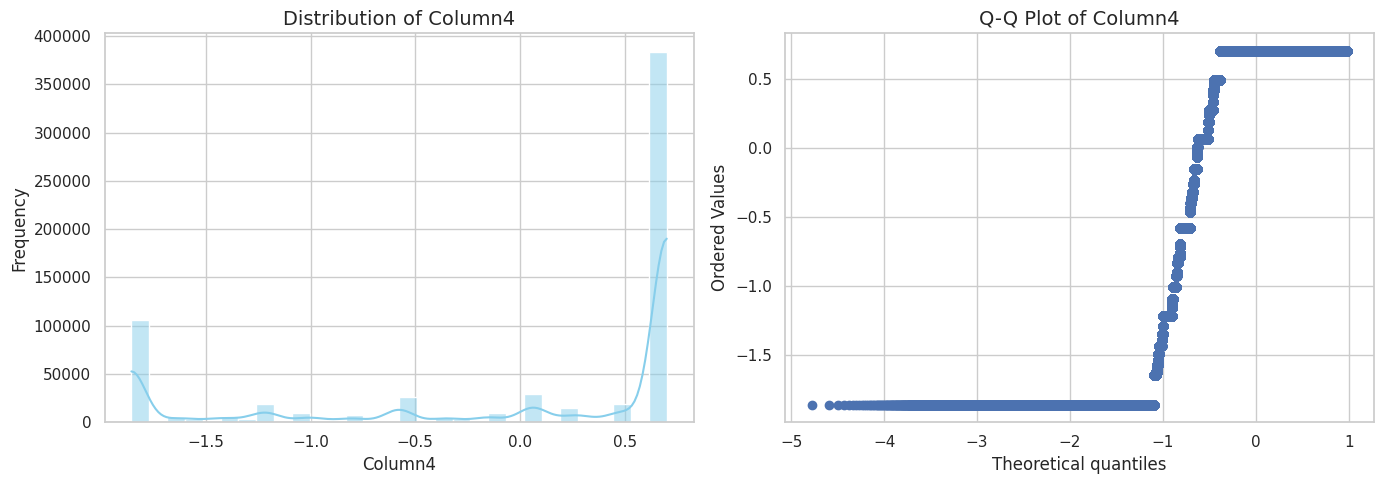

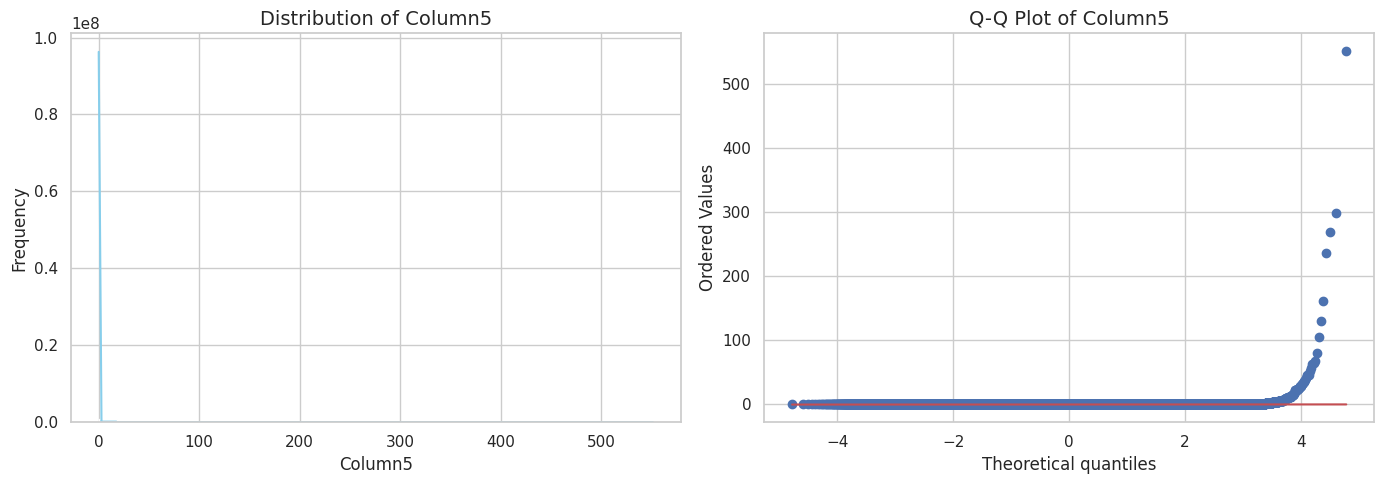

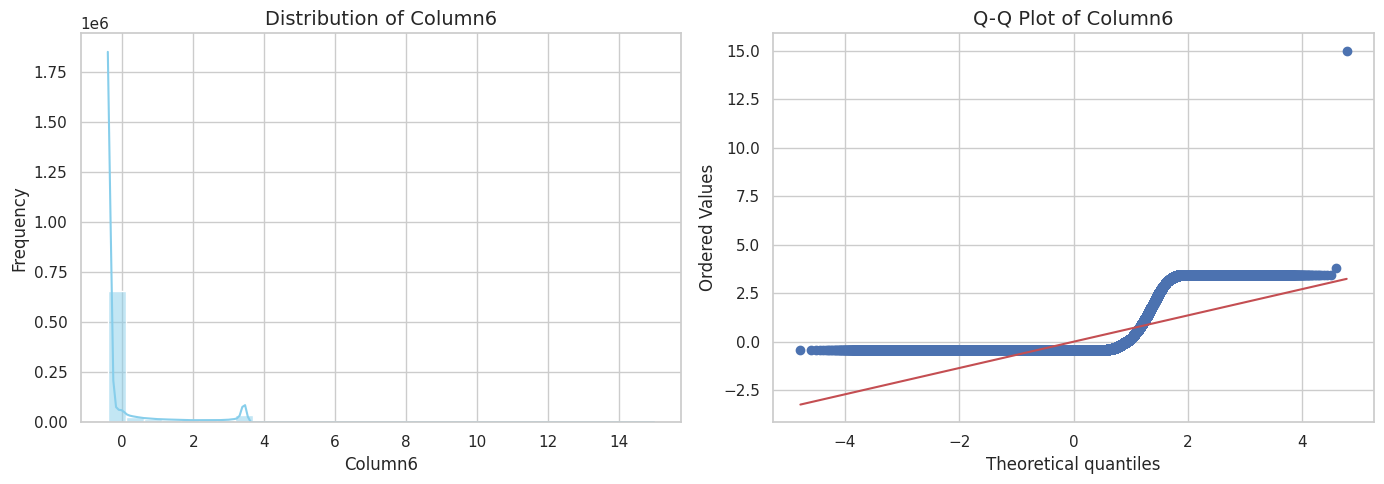

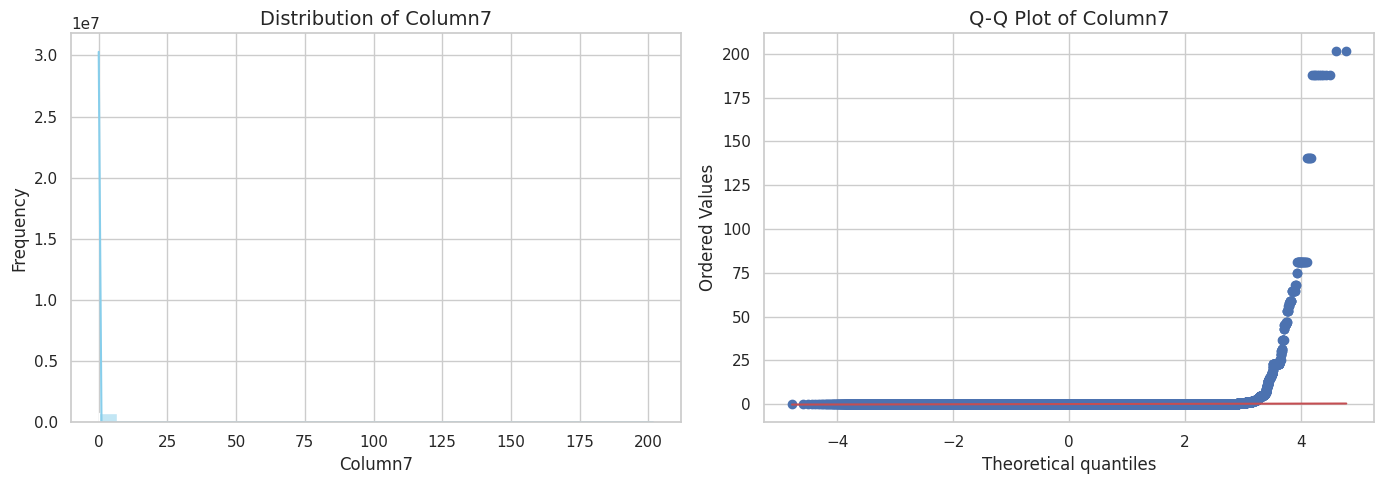

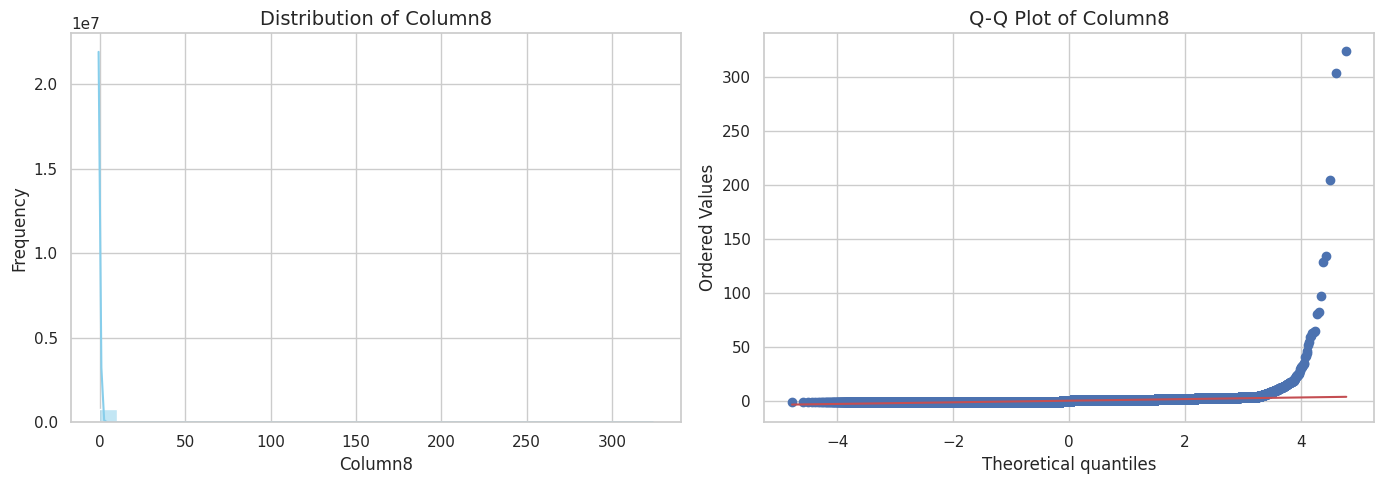

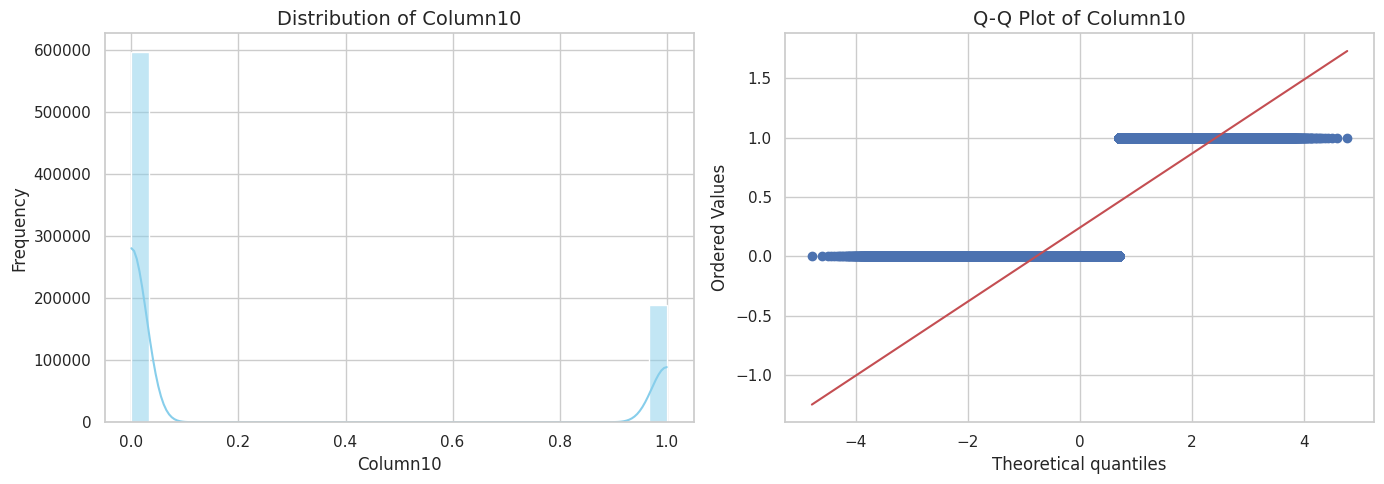

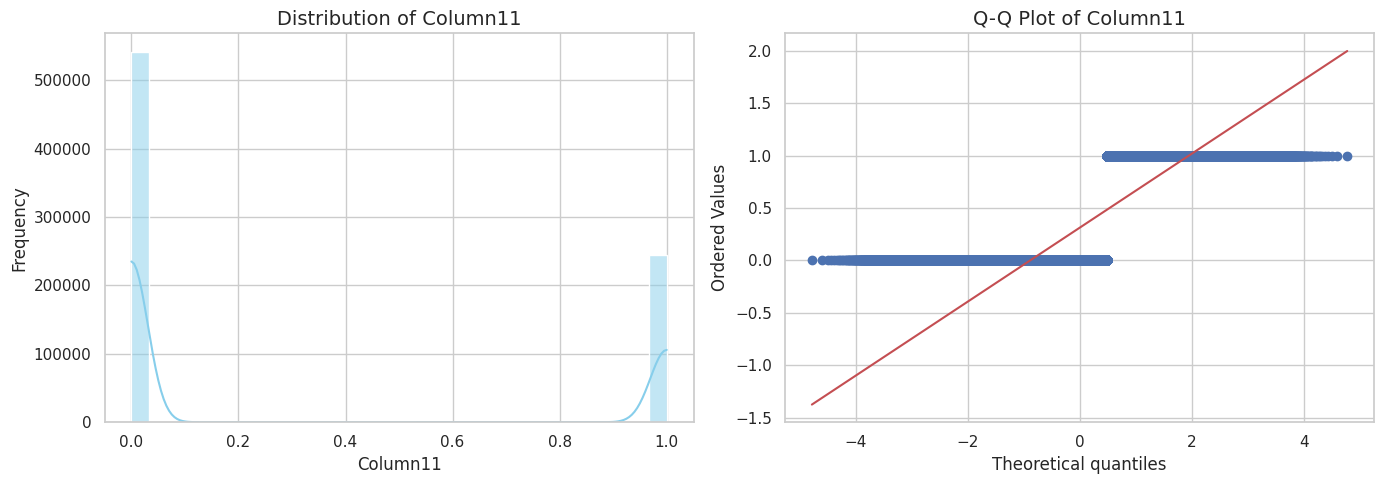

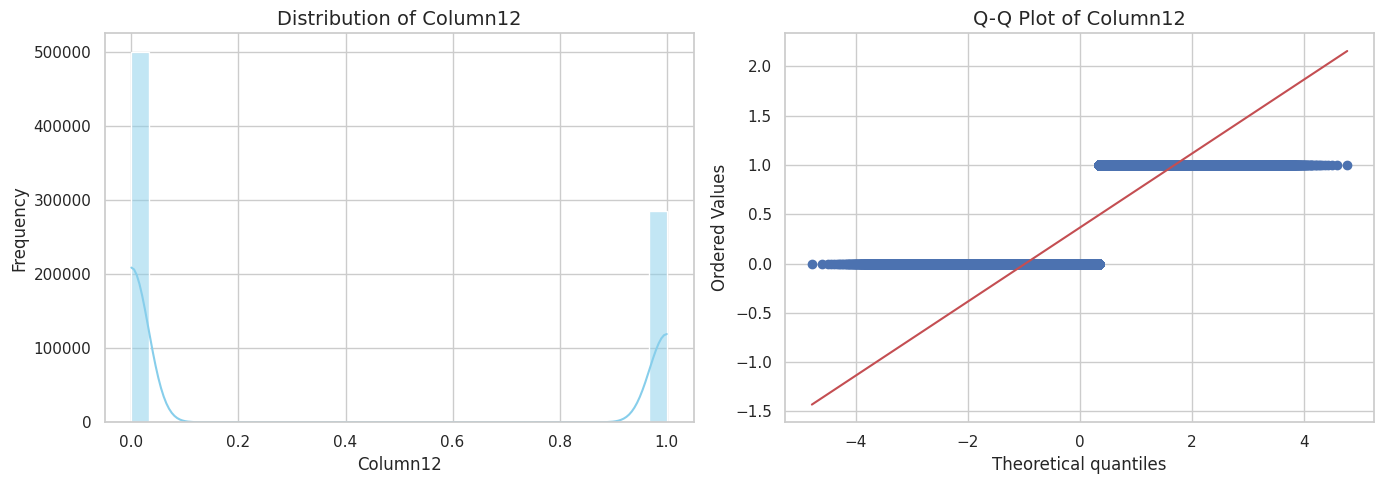

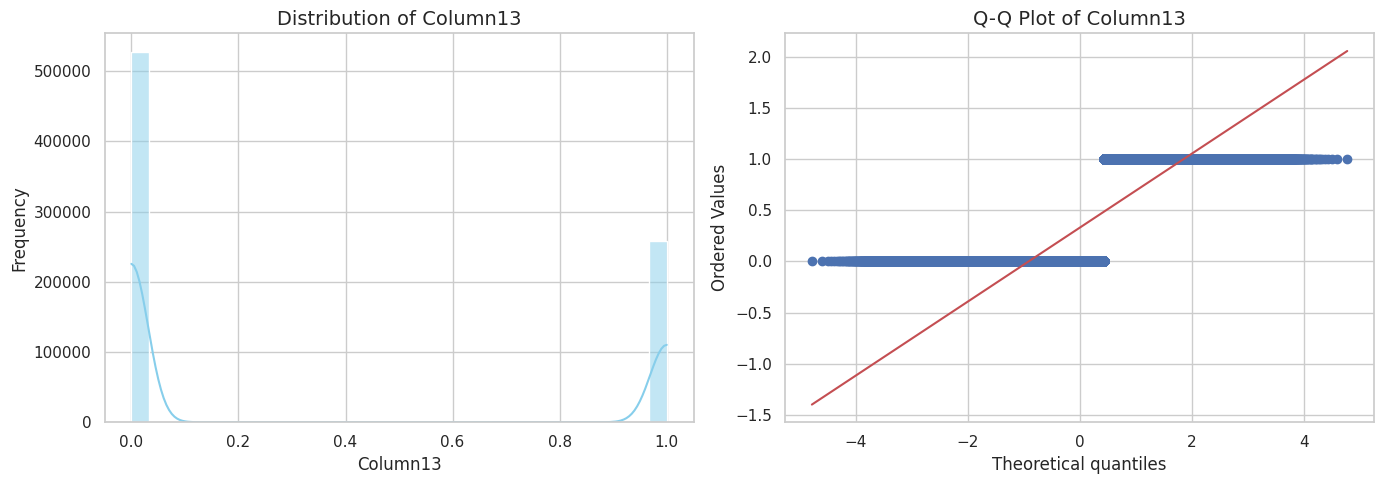

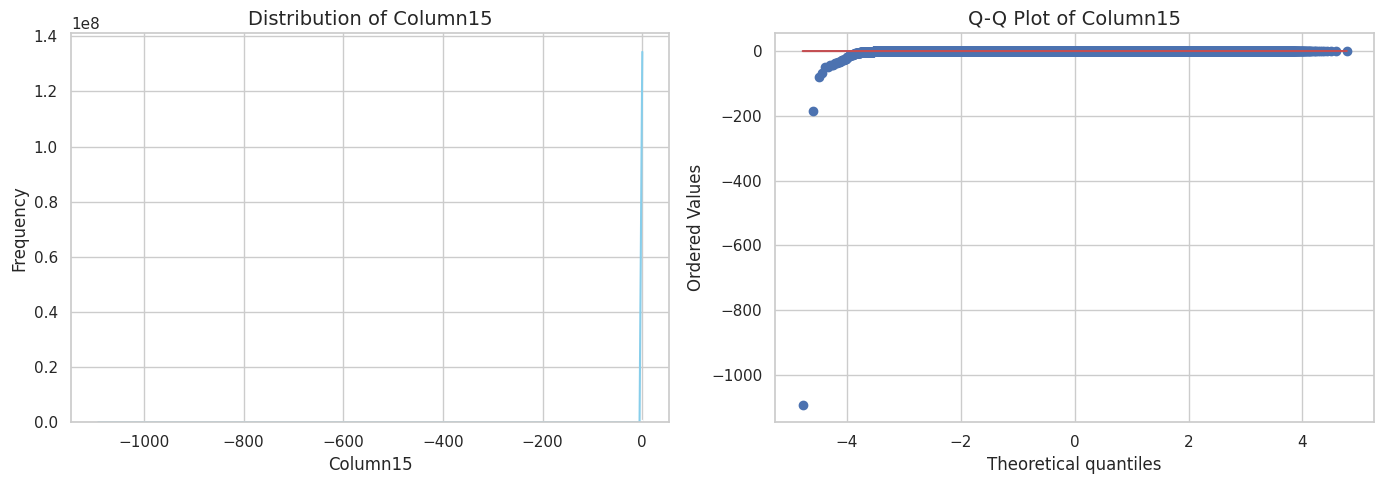

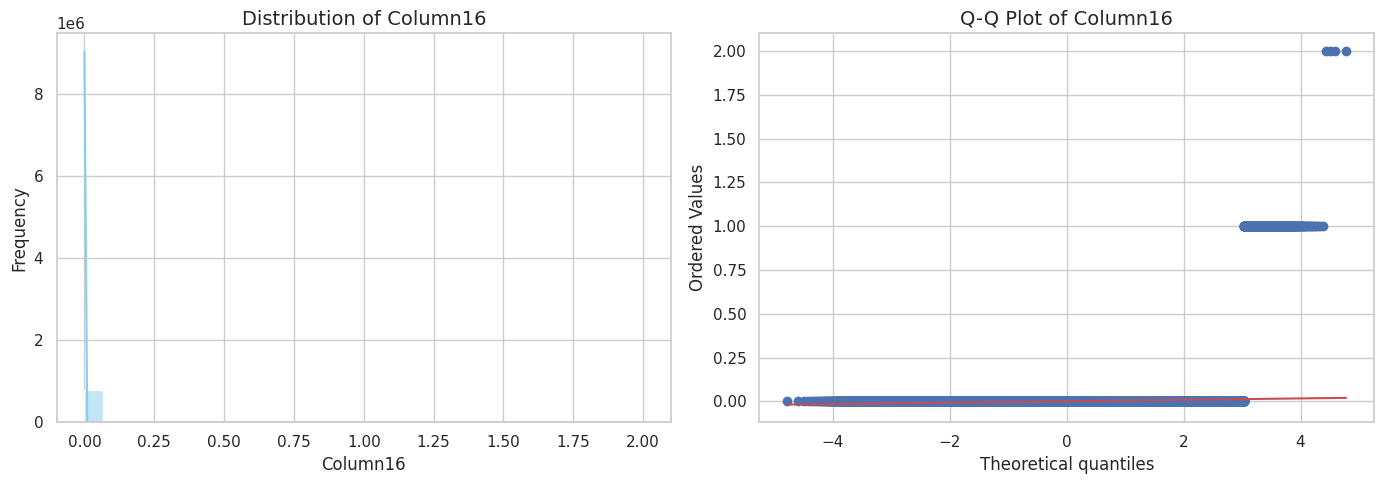

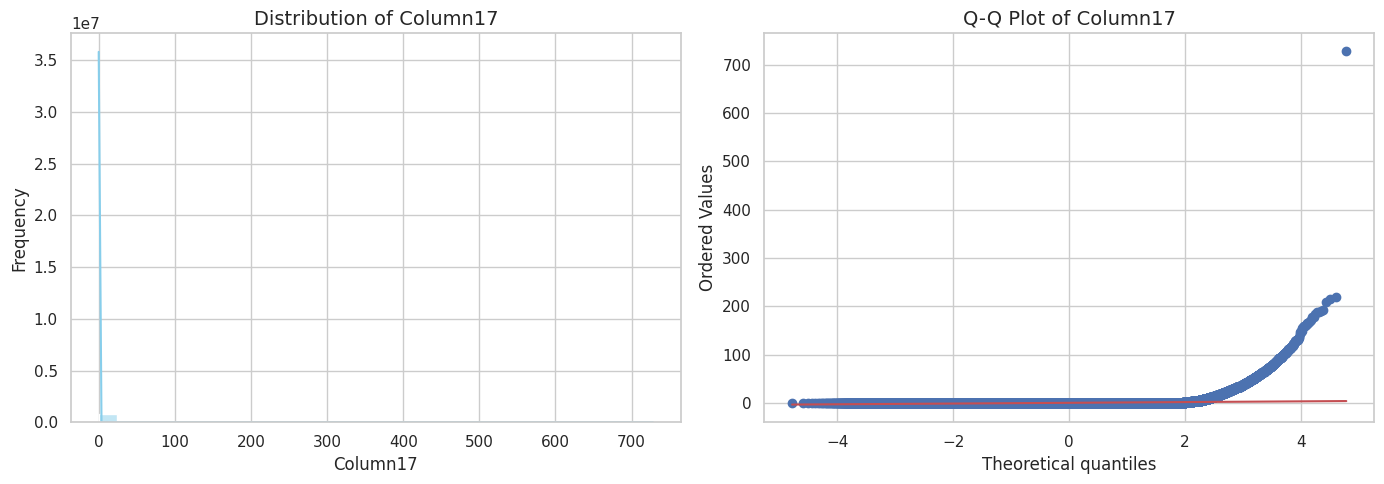

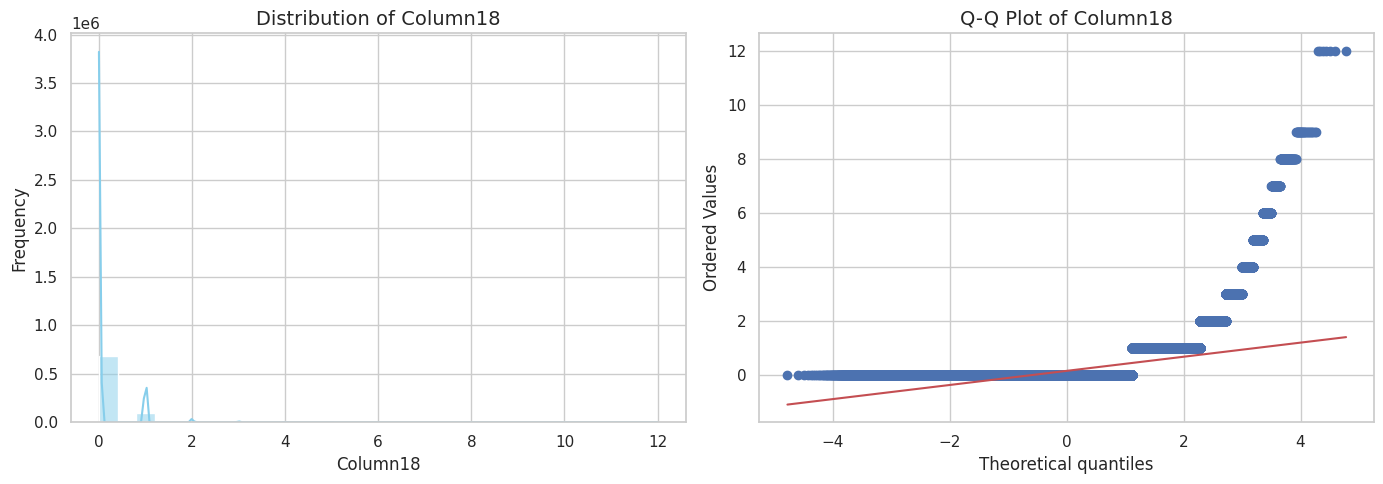

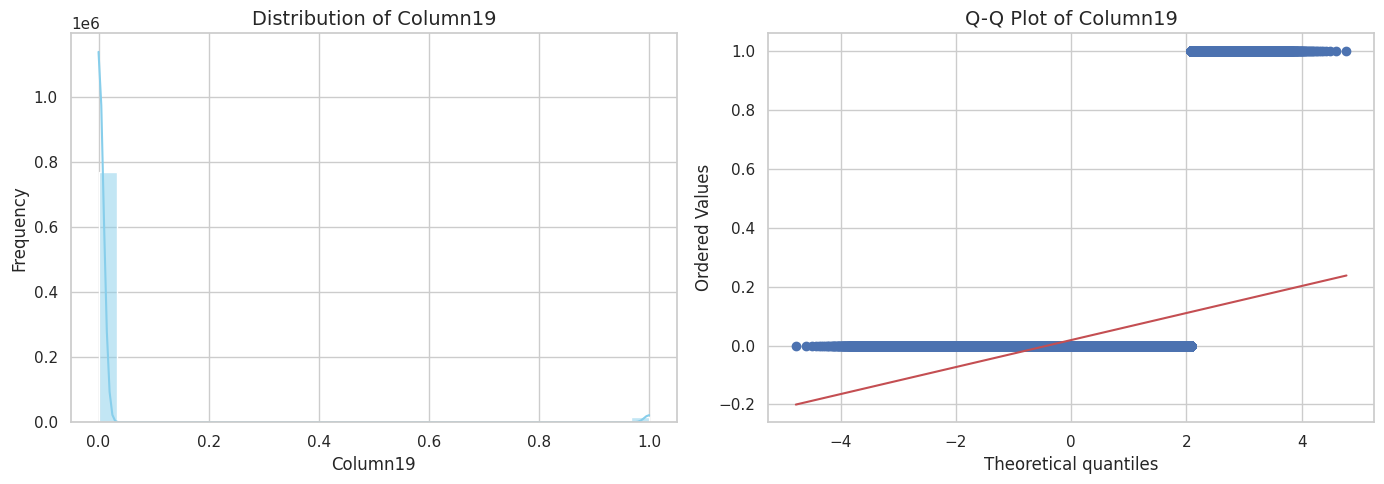

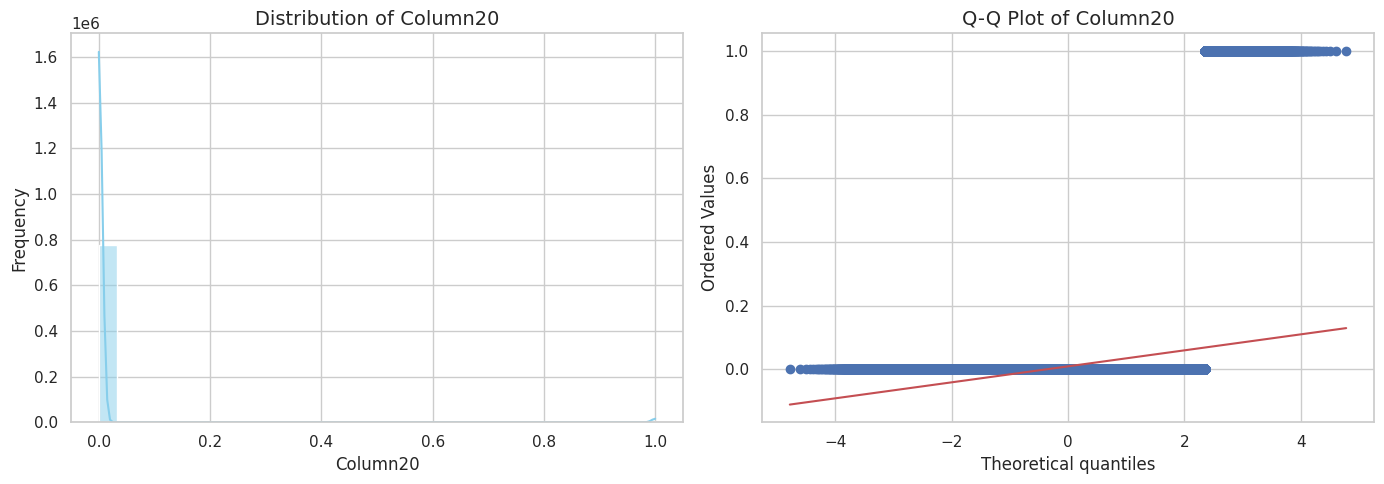

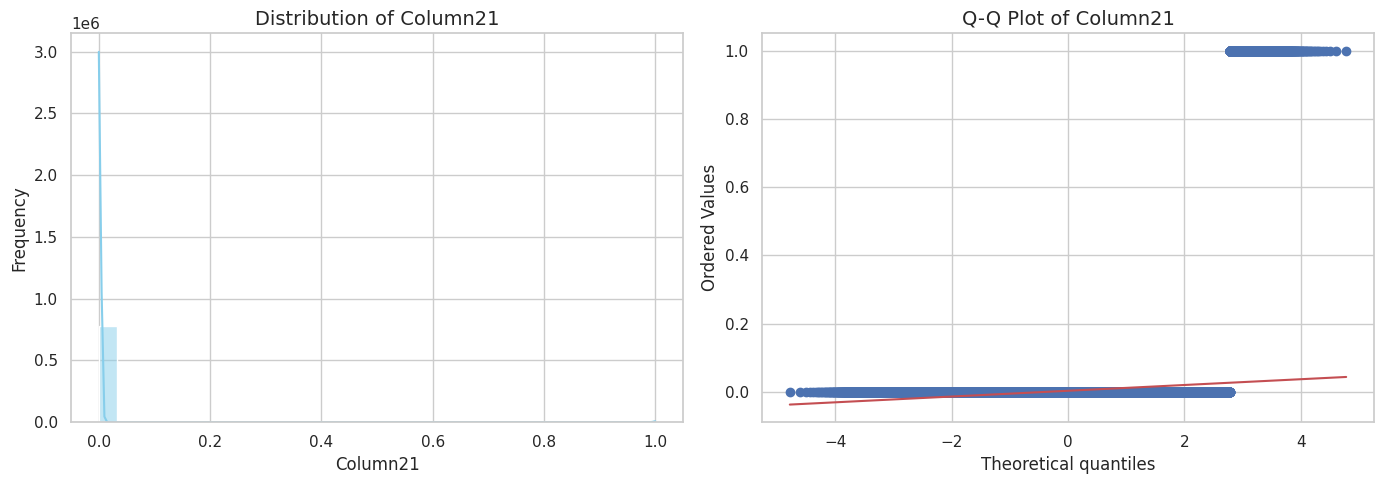

In [ ]:
# Chart - 1 visualization code

# Set a Seaborn theme for better aesthetics
sns.set(style='whitegrid')

# Loop through each column in the DataFrame
for col in x_train.columns:
    # Create a figure with specific size
    plt.figure(figsize=(14, 5))

    # First subplot: Histogram and KDE (with better aesthetics)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Second subplot: Q-Q Plot (Probability Plot)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of {col}", fontsize=14)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()


##### 1. Why did you pick the specific chart?

I picked countplot from seaborn library beacuse it has ability to the show count of all the data in a bar chart.




##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.I found count of released videos in week days.

2.Most videos released on Tuesday,Thursday and Friday.

3.Saturday and Sunday has the least count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help in business like:-

Ted talk should increase the release count on saturday and sunday also.

There is no negative growth in business.

#### Chart - 2

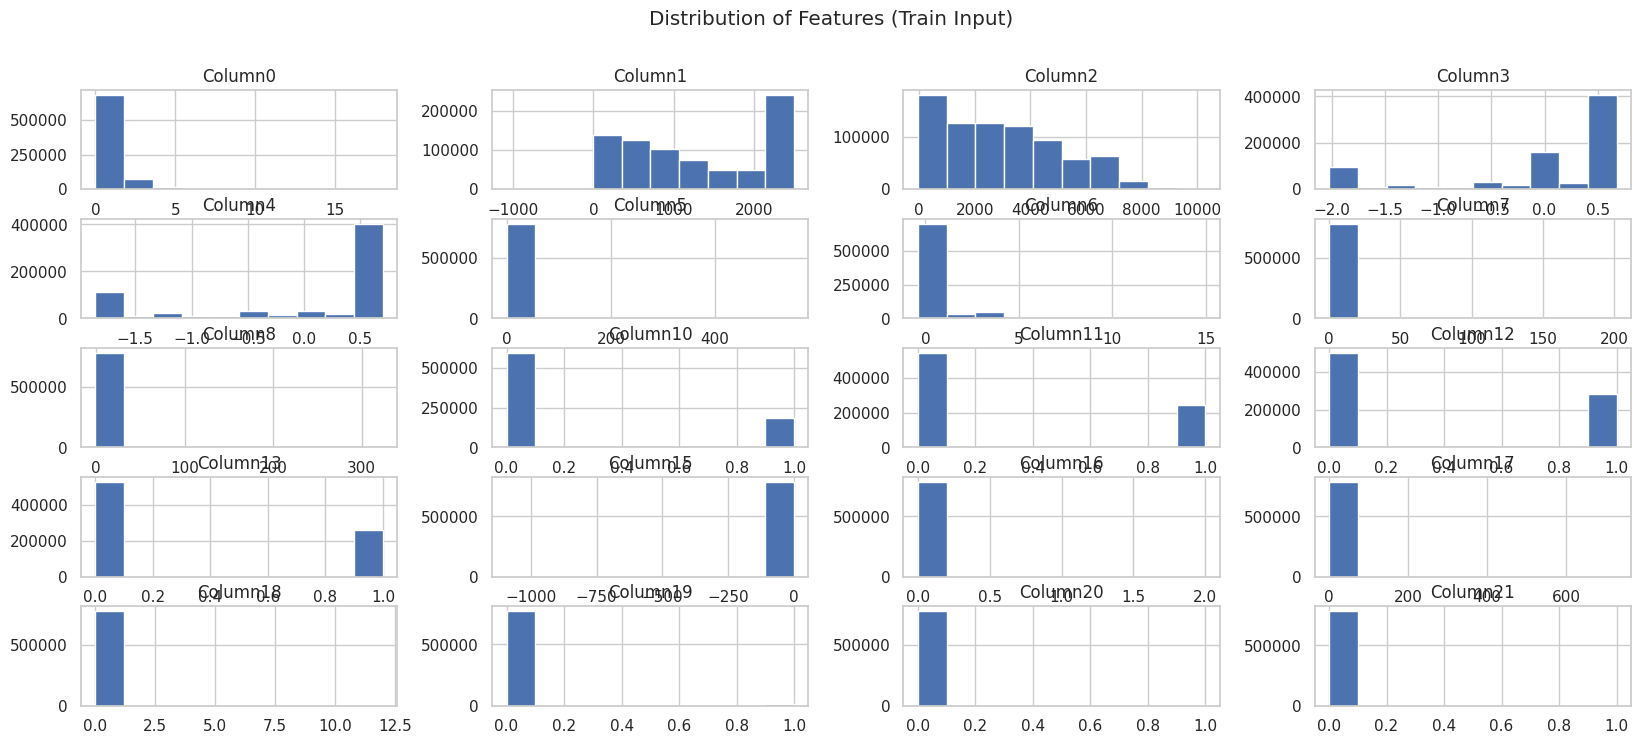

In [ ]:
# Chart - 2 visualization code
x_train.hist(figsize=(20, 8))
plt.suptitle('Distribution of Features (Train Input)')
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn library beacause it can easily show the average views in each day.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.Friday has the most number of average views due to weekend.

2.Tuesday has maximum release count still it has on 3rd position after Wednesday.

3.Saturday & Sunday have least release therefore it has least average views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Same as above ,Ted talk should increase the release count on weekend so people can watch it on weekend also.

2.As compared to number of counts and avg views, people love to watch videos on wekeends.

NameError: name 'df' is not defined

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20, 8))
sns.boxplot(data=x_train, palette="Set3", showfliers=True, linewidth=2)
plt.title('Boxplot of Train Input Features', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked point plot from seaborn beacause it has the ability to show mean of a numeric variable for different levels of a categorical variable.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

1.In 2006 have most number average views following 2013 and 2015.

2.Year 2020 has the least average views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

If we talk about the business mean views are on same scale from 2007 to 2019.In 2013 we cans see the little bit change.

Somwhere the it is going down beacause of number of release videos.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

I picked countplot from seaborn library beacuse it gives us the number of talks release  in each month.

I tried to show it with horizontal bar chart.  

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.April has the most number of release count following February and March.

2.August and December has the least number of release.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted_talk should increase the release count in August and decmber also.

We dont have enough information, why they have less number of release in these two months.

#### Chart - 5 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 8))
correlation_matrix = x_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Train Input Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked heatmap() which used to the correlation between all features in matrix format.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1.Comments and views are highly correlated to each other. It means one variable will increase another also increase.

#### Chart - 6 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Pairplot is a function in the seaborn library in Python that is used to create a matrix of scatter plots to visualize the relationship between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.We can see the how data is scattered to each other.

## ***5. Feature Engineering & Data Pre-processing***

### 2. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
imputer = SimpleImputer(strategy='mean')
x_train['Column4'] = imputer.fit_transform(x_train[['Column4']])
x_test['Column4'] = imputer.fit_transform(x_test[['Column4']])
x_test.isnull().sum()

,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0
Column10,0


In [ ]:
# Applying Yeo Johnson Transformation to handle the skewness in the dataset
pt1 = PowerTransformer(method='yeo-johnson', standardize=True)
x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.transform(x_test)

x_train=pd.DataFrame(x_train_transformed,columns=x_train.columns, index=x_train.index)
x_test=pd.DataFrame(x_test_transformed,columns=x_test.columns,index=x_test.index)

In [ ]:
x_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.013035,1.255680,0.452043,0.980435,0.953037,-0.520564,1.794742,0.490558,0.895548,-0.562836,-0.670974,-0.755089,-0.699089,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
1,-0.497109,1.255680,0.339731,0.145693,0.953037,-0.520441,1.810349,3.178617,0.650176,-0.562836,-0.670974,-0.755089,-0.699089,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
2,2.013035,1.255680,0.777778,-1.393824,-1.406460,-0.523915,-0.597410,-0.364296,-1.039528,1.776715,1.490370,1.324347,1.430433,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
3,-0.497109,-1.220321,-1.650569,-0.694660,-0.347492,1.915055,-0.597410,-0.364296,-1.039528,-0.562836,-0.670974,-0.755089,-0.699089,0.150184,-0.034677,-0.155068,2.582012,-0.138265,-0.097157,-0.052584
4,-0.497109,-0.597819,-0.852495,-1.468482,-1.455899,1.915055,-0.597410,-0.364296,-1.039528,-0.562836,-0.670974,-0.755089,-0.699089,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,-0.497109,-1.091239,-0.749087,0.980435,0.953037,-0.523915,-0.597410,-0.364296,-1.039528,-0.562836,-0.670974,-0.755089,-0.699089,0.150184,-0.034677,-0.155068,2.582012,-0.138265,-0.097157,-0.052584
785129,-0.497109,1.255680,-0.178455,0.980435,0.953037,-0.520403,-0.597410,-0.364296,0.814130,1.776715,1.490370,1.324347,1.430433,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
785130,-0.497109,1.255680,0.465938,0.980435,0.953037,-0.523915,-0.597410,-0.364296,0.539045,-0.562836,-0.670974,1.324347,1.430433,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
785131,-0.497109,1.240469,0.758305,-0.692811,-0.865107,-0.519460,-0.597410,-0.364296,0.716319,1.776715,1.490370,1.324347,1.430433,0.150184,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584


##### What all feature selection methods have you used  and why?

Answer Here:-

1.We just create some features by normal python function.

2.Drop some unwanted features.

3.**We will do some features selection after removing of outliers.**

### 3. Handling Outliers

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785133 non-null  float64
 1   Column1   785133 non-null  float64
 2   Column2   785133 non-null  float64
 3   Column3   785133 non-null  float64
 4   Column4   785133 non-null  float64
 5   Column5   785133 non-null  float64
 6   Column6   785133 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   785133 non-null  float64
 9   Column10  785133 non-null  float64
 10  Column11  785133 non-null  float64
 11  Column12  785133 non-null  float64
 12  Column13  785133 non-null  float64
 13  Column15  785133 non-null  float64
 14  Column16  785133 non-null  float64
 15  Column17  785133 non-null  float64
 16  Column18  785133 non-null  float64
 17  Column19  785133 non-null  float64
 18  Column20  785133 non-null  float64
 19  Column21  785133 non-null  float64
dtypes: f

<Axes: xlabel='Column0'>

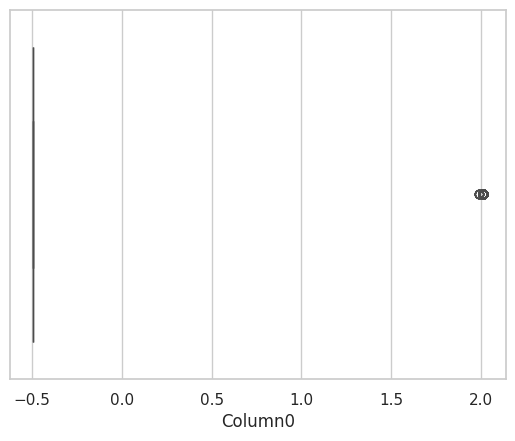

In [ ]:
sns.boxplot(data = x_train,x='Column0')

In [ ]:
# Handling Outliers & Outlier treatments
# We have some outliers in each features
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR

((x_train < outlier1) | (x_train > outlier2)).sum()


,0
Column0,155575
Column1,6
Column2,1
Column3,0
Column4,0
Column5,168841
Column6,0
Column7,166458
Column8,150
Column10,188883


### 5. Feature  Selection






#### 1. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Import the library use in feature selection

from sklearn.feature_selection import f_regression
f_scores = f_regression(x_train,y_train)
f_scores[1]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 8.82705722e-256, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

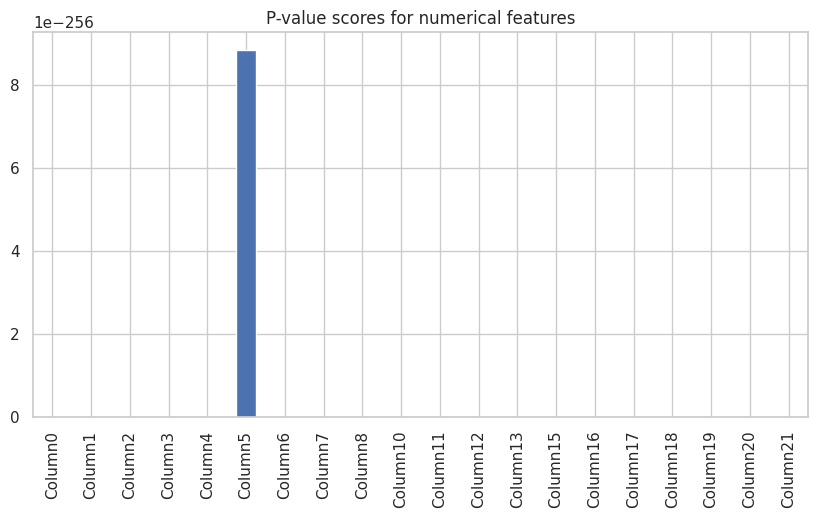

In [ ]:
# find the p_values
p_values = pd.Series(f_scores[1],index = x_train.columns )
plt.figure(figsize = (10,5))
p_values.plot(kind = 'bar')
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
# selectng p_value less than 0.005
selected_features = np.where(p_values<0.005)[0]
x_train = x_train.iloc[0: , selected_features]

In [ ]:
# Getting VIF for best feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values ,i) for i in range(x.shape[1])]

  return(vif)

In [ ]:
calc_vif(x_train)

,variables,VIF
0,Column0,1.302916
1,Column1,1.720245
2,Column2,1.232555
3,Column3,4.568730
4,Column4,4.391751
5,Column5,1.791511
6,Column6,1.908802
7,Column7,1.450871
8,Column8,2.090296
9,Column10,4.236278






##### What all feature selection methods have you used  and why?

Answer Here.

**Feature_selection**:-The function returns the F-value and p-value of the linear regression test for each feature in the dataset, which can be used to select the features with the highest F-value and lowest p-value.

**VIF**:-The Variance Inflation Factor (VIF) is a statistical measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when there is a high correlation between independent variables (also called predictor variables or features) in a regression model.



In [ ]:
print(x_train.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21'],
      dtype='object')


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

# Verify the new class distribution after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Sampled class distribution:\n", y_train_sampled.value_counts())


Original class distribution:
 target
0         711100
1          74033
Name: count, dtype: int64
Sampled class distribution:
 target
0         711100
1         711100
Name: count, dtype: int64





##### Which all features you found important and why?

Answer Here.

These are some features which we can use in creating a model.We removed multicollinear features and  with feature_selection we found P-value.

## ***6. ML Model Implementation***

### ML Model -  Logistic Regression Model









In [ ]:

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(lr, x_train_sampled, y_train_sampled, cv=5)  # You can change cv to any number of folds you prefer

# Fit the model on the entire training dataset
lr.fit(x_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Print the results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Cross-Validation Scores: [0.98150752 0.98167979 0.98121221 0.98118057 0.98155323]
Mean CV Accuracy: 0.9814266629166081
Accuracy: 0.967746989056673
Confusion Matrix:
 [[228651   8383]
 [    58  24620]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.75      1.00      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712



In [ ]:
# Define the model
lr = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solvers compatible with l1 and l2 penalties
}

# Initialize GridSearchCV without using cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           scoring='accuracy', cv=2, n_jobs=-1, verbose=1)

# Fit the model on the entire training dataset
grid_search.fit(x_train_sampled, y_train_sampled)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)

# Print the results
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 2 folds for each of 40 candidates, totalling 80 fits


#### 1. Explain the ML Model used and it's performance using Evaluation metric


In [ ]:
# Visualizing evaluation Metric Score chart
Linear_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :" ,Linear_MAE)
Linear_MSE = mean_squared_error(y_test,y_pred)
print("MSE :" ,Linear_MSE)
Linear_RMSE = np.sqrt(Linear_MSE)
print("RMSE :" ,Linear_RMSE)
Linear_r2 = r2_score(y_test,y_pred)
print("r2 :" ,Linear_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
Linear_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,Linear_adjusted_r2)

In [ ]:
Linear_Dataframe = pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])
Linear_Dataframe

Answer:

1.The first model we used is Linear Regression.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean absolute Error**:-It is calculated as the average of the absolute differences between the predicted values and the true values

2.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values.

3.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values.

4.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

5.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

#### 2. Cross- Validation & Hyperparameter Tuning

**Lasso Regularization**


In [ ]:
# Import  lasso regularization and gridsearchCV

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150,160,170,200]}

# Fit the Algorithm
lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error' ,cv = 5)
lasso_regressor.fit(x_train, y_train)

# Use lasso
lasso = Lasso(alpha = 200, max_iter =  3000)
lasso.fit(x_train,y_train)

In [ ]:
# Predict on the model
y_pred_lasso = lasso_regressor.predict(x_test)
lasso_MAE = mean_absolute_error(y_test,y_pred_lasso)
print("MAE :" ,lasso_MAE)
lasso_MSE = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" ,lasso_MSE)
lasso_RMSE = np.sqrt(lasso_MSE)
print("RMSE :" ,lasso_RMSE)
lasso_r2 = r2_score(y_test,y_pred_lasso)
print("r2 :" ,lasso_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
lasso_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,lasso_adjusted_r2)

**Lasso regularization**:-Lasso regression, also known as L1 regularization, is a type of linear regression that uses a regularization term to shrink the coefficients of less important features to zero, effectively removing them from the model.

If we comapare linear regression and lasso than, Lasso giving us a slightly better result.

So we can consider Lasso as better model.

In [ ]:
Lasso_Dataframe = pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])
Lasso_Dataframe

**Ridge Regularization**

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

# Fit the model
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(x_train,y_train)

In [ ]:
# predict the model
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
# All the metrics
ridge_MAE = mean_absolute_error(y_test,y_pred_ridge)
print("MAE :" ,ridge_MAE)
ridge_MSE = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" ,ridge_MSE)
ridge_RMSE = np.sqrt(ridge_MSE)
print("RMSE :" ,ridge_RMSE)
ridge_r2 = r2_score(y_test,y_pred_ridge)
print("r2 :" ,ridge_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
ridge_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,ridge_adjusted_r2)


**Ridge Regularization**:-Ridge regularization is a technique used to prevent overfitting in a linear regression model. It adds a penalty term to the cost function that the model is trying to minimize, with the goal of shrinking the parameters of the model towards zero.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

Here Ridge is giving us the better result than other.

In [ ]:
Ridge_Dataframe = pd.DataFrame(zip(y_test, y_pred_ridge), columns = ['actual', 'pred'])
Ridge_Dataframe

**Elastic Net Regularization**

In [ ]:
# Import Elastic Net
from sklearn.linear_model import ElasticNet
elastic= ElasticNet()

# Parameters
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic,parameters,scoring= 'neg_mean_squared_error',cv = 5)

# Fit the model
elastic_regressor.fit(x_train,y_train)


In [ ]:
# predict the model
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
#  getting the evaluation metrics
Elastic_MAE = mean_absolute_error(y_test, y_pred_elastic)
print("MAE :" ,Elastic_MAE)

Elastic_MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" ,Elastic_MSE)

Elastic_RMSE = np.sqrt(Elastic_MSE)
print("RMSE :" ,Elastic_RMSE)

Elastic_r2 = r2_score(y_test,y_pred_elastic)

print("R2 :" ,Elastic_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
Elastic_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Elastic_adjusted_r2)

**Elastic Net regularization**:-Elastic Net regularization is a combination of Ridge and Lasso regularization. It adds a penalty term to the cost function that the model is trying to minimize, with the goal of shrinking the parameters of the model towards zero.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

ElasticNet r2 score= 79.63%

Here we can consider Ridge due to same result.

In [ ]:
Elastic_Dataframe = pd.DataFrame(zip(y_test, y_pred_elastic), columns = ['actual', 'pred'])
Elastic_Dataframe

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

**GridSearch CV**:-

GridSearchCV is a method in scikit-learn library, used to tune hyperparameters of a model by exhaustively trying every combination of provided parameter values. It takes an estimator (model), a set of hyperparameters to search over, and a scoring method as input and returns the best combination of parameters that gives the best score as output.

This way GridSearchCV makes the process of tuning the parameters of a model more efficient and less time-consuming.

In [ ]:
# Evaluation metric score chart

model_data = pd.DataFrame()
model_data['Model Name'] = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression']
model_data['MSE'] = [Linear_MSE,ridge_MSE,lasso_MSE,Elastic_MSE]
model_data['RMSE'] = [Linear_RMSE,ridge_RMSE,lasso_RMSE,Elastic_RMSE]
model_data['R2'] = [Linear_r2,ridge_r2,lasso_r2,Elastic_r2]
model_data['Adjusted R2'] = [Linear_adjusted_r2,ridge_adjusted_r2,lasso_adjusted_r2,Elastic_adjusted_r2]
model_data

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Linear r2 score = 79.53%**

**Lasso r2 score = 79.60%**

**Ridge r2 score = 79.63%**

**ElasticNet r2 score= 79.63%**

We did not see major improvement but yeah we improved our model 0.1%.This could useful for large amount of data.

### ML Model - Decision Tree

In [ ]:
# ML Model - 2  Implementation
decision_tree=DecisionTreeRegressor(max_depth=5)

# Fit the Algorithm
decision_tree.fit(x_train, y_train)

# Predict on the model
y_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
DT_MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , DT_MSE)

DT_RMSE = np.sqrt(DT_MSE)
print("RMSE :" ,DT_RMSE)

DT_r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,DT_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
DT_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",DT_adjusted_r2)

Answer:-

1.The model we used is **Decision Tree**.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values.

2.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values.

3.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

4.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

ElasticNet r2 score= 79.63%

Decision Tree r2 score = 79.60%

Here we can not consider Decision Tree  due to bad result.

In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(y_test, y_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

### ML Model - Random Forest

In [ ]:
# ML Model - 3 Implementation
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)

# Fit the Algorithm
random_forest.fit(x_train, y_train)


# Predict on the model
y_pred_rf=random_forest.predict(x_test)

In [ ]:
# Features Importance
features = x_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)


In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
RF_MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , RF_MSE)

RF_RMSE = np.sqrt(RF_MSE)
print("RMSE :" ,RF_RMSE)

RF_r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,RF_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
RF_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",RF_adjusted_r2)

Answer:-

1.The model we used is **Random Forest**.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values.

2.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values.

3.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

4.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

In [ ]:
rf_Dataframe = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Linear r2 score = 79.53%**

**Lasso r2 score = 79.60%**

**Ridge r2 score = 79.63%**

**ElasticNet r2 score= 79.63%**

**Decision Tree r2 score = 79.60%**

**Random Forest r2 score = 81.50%**

Yes ,Here we can see major improvemnet In **Random Forest** with 81.50%.

So we can consider Random Forest as a best model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

**Adjusted r2**:

It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

It is giving the better result with Random Forest.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

So for final prediction we choosed **RandomForest** as best model.

Its giving us the best result compare to other models

**MSE : 212902526448.1948**

**RMSE : 461413.6175365816**

**R2 : 0.8150004330258723**

**Adjusted R2 :  0.8137598659380324**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

Random Forest as a model, Random Forest models are known for their interpretability, as it is relatively easy to understand how the model is making predictions. One way to understand feature importance in Random Forest is by using the feature_importances_ attribute of the model, which returns the importance of each feature in the dataset.

# **Conclusion**

###After loading the dataset, cleaning the data, performing EDA, dealing with Null Values, Outliers and after feature selection following Models are built.

In [ ]:
# Evaluation metric score chart

model_data = pd.DataFrame()
model_data['Model Name'] = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression','Decision Tree','Random Forest']
model_data['MSE'] = [Linear_MSE,ridge_MSE,lasso_MSE,Elastic_MSE,DT_MSE,RF_MSE]
model_data['RMSE'] = [Linear_RMSE,ridge_RMSE,lasso_RMSE,Elastic_RMSE,DT_RMSE,RF_RMSE]
model_data['R2'] = [Linear_r2,ridge_r2,lasso_r2,Elastic_r2,DT_r2,RF_r2]
model_data['Adjusted R2'] = [Linear_adjusted_r2,ridge_adjusted_r2,lasso_adjusted_r2,Elastic_adjusted_r2,DT_adjusted_r2,RF_adjusted_r2]
model_data

###Here we can easily see comparision Evaluation metric score chart of all the models.

###RandomForest Regressor giving us the best result

###So, after comparing MSE values it is evident that ***Random Forest Regressor*** is the best performer.

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!***